In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [87]:
df = pd.read_csv('spotify.csv')

features_list = df.columns.tolist()
metadata_list = features_list[:4]
numeric_list = features_list[4:]

numeric = df[numeric_list]
small_vals = numeric.drop(['popularity', 'tempo', 'duration_ms', 'key', 'loudness', 'time_signature'], axis=1)

df

,artist,name,id,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,DaBaby,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,2020-04-17,100,0.746,0.690,11,-7.956,1,0.1640,0.24700,0.000000,0.1010,0.497,89.977,181733,4
1,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,2020-03-20,99,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
2,Jawsh 685,Savage Love (Laxed - Siren Beat),1xQ6trAsedVPCdbtDAmk0c,2020-06-11,97,0.767,0.481,0,-8.520,0,0.0803,0.23400,0.000000,0.2690,0.761,150.076,171375,4
3,Topic,Breaking Me,3H7ihDc1dqLriiWXwsc2po,2019-12-19,96,0.789,0.720,8,-5.652,0,0.2180,0.22300,0.000000,0.1290,0.664,122.031,166794,4
4,Harry Styles,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,2019-12-13,96,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,J Balvin,Sigo Extrañándote,5Uc9brIj5A76d4TYpLJt94,2020-07-31,42,0.872,0.865,9,-4.248,1,0.2440,0.17400,0.000034,0.1590,0.935,93.035,202373,4
1908,J Balvin,Brillo,614Z2GSe3D7ckYkGGgTZag,2020-07-31,41,0.524,0.384,9,-10.049,0,0.3600,0.89000,0.000000,0.0964,0.768,145.947,159573,4
1909,J Balvin,Rosa,3EvvkX6FRLHT0VR2gjJ0Wk,2020-07-31,41,0.637,0.561,9,-5.686,0,0.2680,0.25700,0.000080,0.3670,0.336,176.025,190253,4
1910,J Balvin,Rojo,5Gl3YVEjwOOQmLTsA2ajS7,2020-07-31,41,0.608,0.610,11,-3.862,1,0.1500,0.14100,0.000048,0.0872,0.377,172.305,150853,4


In [10]:
df.describe(include='all')

,artist,name,id,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1912,1912,1912,1912,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000,1912.000000
unique,647,1823,1912,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Juice WRLD,Falling,55S2PQgSMYAhgoTCcGCDfw,2020-07-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,3,1,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,75.754184,0.687620,0.608586,5.281381,-6.713757,0.611402,0.134271,0.242181,0.014519,0.174710,0.482951,121.967656,194535.415272,3.949268
std,NaN,NaN,NaN,NaN,6.172323,0.149144,0.167650,3.593894,2.945877,0.487559,0.124285,0.244667,0.094942,0.130800,0.221991,30.421685,43570.064390,0.384198
min,NaN,NaN,NaN,NaN,40.000000,0.000000,0.000216,0.000000,-31.839000,0.000000,0.000000,0.000118,0.000000,0.029400,0.000000,0.000000,48000.000000,0.000000
25%,NaN,NaN,NaN,NaN,72.000000,0.594750,0.507000,2.000000,-7.881500,0.000000,0.045175,0.048400,0.000000,0.099075,0.316750,97.894000,168789.500000,4.000000
50%,NaN,NaN,NaN,NaN,75.000000,0.704000,0.620000,5.000000,-6.182000,1.000000,0.078250,0.152000,0.000000,0.122500,0.483000,120.068000,192435.500000,4.000000
75%,NaN,NaN,NaN,NaN,79.000000,0.794000,0.726250,8.000000,-4.944750,1.000000,0.196000,0.371250,0.000012,0.204000,0.651000,144.026500,216032.250000,4.000000


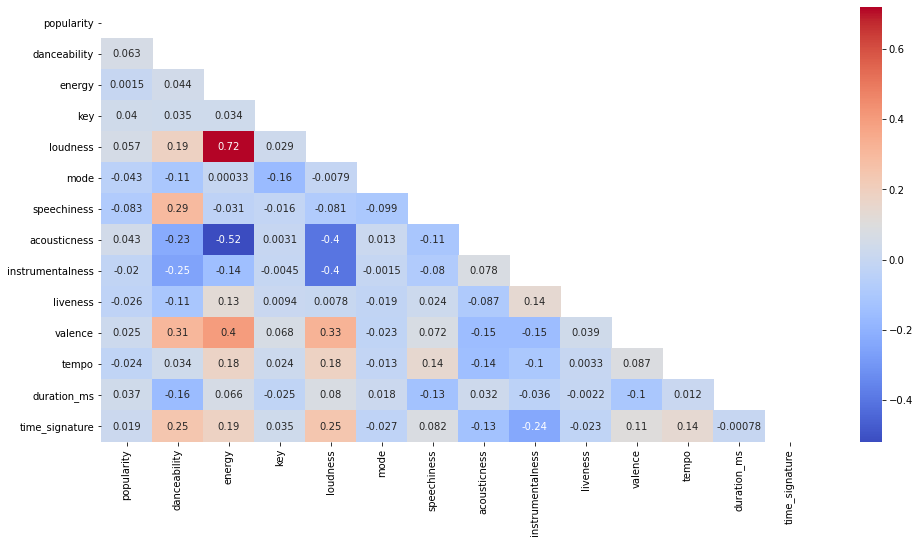

In [27]:
mask = np.triu(numeric.corr())
plt.figure(figsize=(16, 8))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', mask=mask)
plt.show()

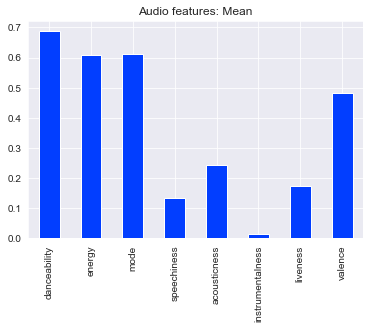

In [48]:
sns.set_palette('bright')
sns.set_style('darkgrid')

small_vals.mean().plot.bar()
plt.title('Audio features: Mean')
plt.show()

In [70]:
def feature_distplot(feature):
    sns.distplot(df[feature])
    plt.axvline(df[feature].mean(), linestyle='--')
    if feature in small_vals.columns.tolist():
        plt.xlim((0, 1))
    plt.show()
    print('Mean value for {}: {}'.format(feature, df[feature].mean()))

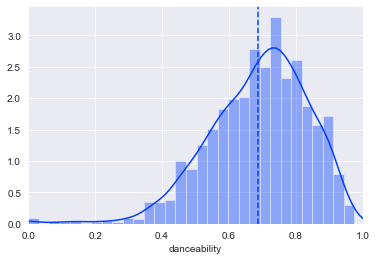

Mean value for danceability: 0.6876198221757323


In [71]:
feature_distplot('danceability')

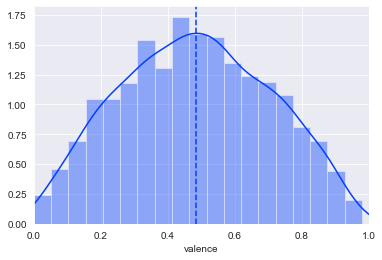

Mean value for valence: 0.48295147489539747


In [72]:
feature_distplot('valence')

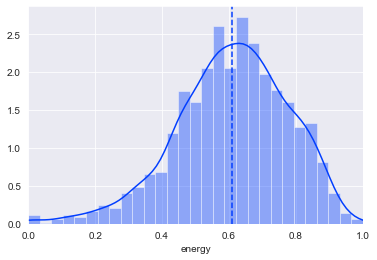

Mean value for energy: 0.608585710251046


In [73]:
feature_distplot('energy')

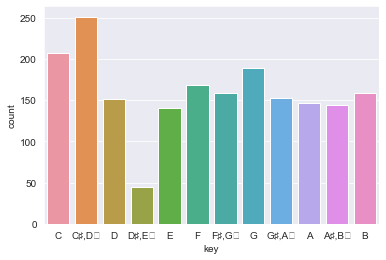

In [92]:
key_map = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
keys = pd.DataFrame({'key': df.sort_values(by='key').loc[:,'key'].map(key_map)})
sns.countplot(x='key', data=keys)

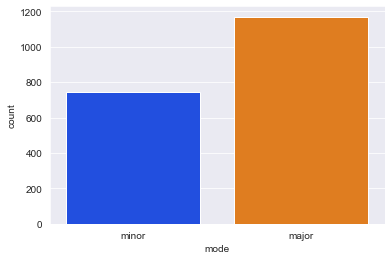

In [95]:
mode_map = {0.0: 'minor', 1.0: 'major'}
modes = pd.DataFrame({'mode': df.sort_values(by='mode').loc[:,'mode'].map(mode_map)})
sns.countplot(x='mode', data=modes)